# Space Flights Historical Missions Overview

In my Project I am going to study a Space Flights Dataset to discover some interesting information about the history of human space flights.

Even though this dataset is not purely numerical which can cause some more difficulties than working with a purely numerical or mostly numerical set it should still doable to study it.

In further cells my work is presented with a short conclusion at the end, which contains, in my opinion, the most interesting facts about this dataset.

## Data Preparation and Cleaning

This part will be focused on cleaning the dataset so that is easier to use and look at.

In [3]:
import matplotlib.pyplot as plt
import datetime as dt
import io
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
# Creating a dataframe with choosen csv file.
spaceFlights_df = pd.read_csv('Space_Corrected.csv', parse_dates= ['Datum'])

In [5]:
# Looking if the dataframe looks good.
spaceFlights_df

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [6]:
# Cleaning the dataset. The only thing I had to do was to get rid of 2 columns that were basically a copy of the numbering column.
SF_df = spaceFlights_df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [7]:
# Making sure that the Datum column is a DateTime object
SF_df['Datum'] = pd.to_datetime(SF_df['Datum'], errors='coerce', utc=True)

In [8]:
# Check
SF_df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [9]:
# Getting rid of hours, minutes and seconds leaving only date
SF_df['Datum'] = SF_df['Datum'].dt.floor(freq = 'D')

In [10]:
# Check
SF_df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 00:00:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 00:00:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 00:00:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 00:00:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 00:00:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 00:00:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 00:00:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 00:00:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 00:00:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Exploratory Analysis and Visualization

Basic analysis of the dataset.

In [11]:
# Adding together the same mission statuses
statusMission_df = SF_df['Status Mission'].value_counts()
statusMission_df

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Status Mission, dtype: int64

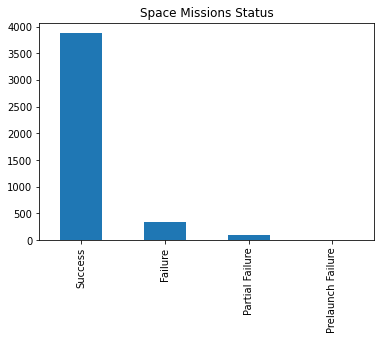

In [12]:
# Overall space flight missions outcomes in a bar plot
statusMission_df.plot(kind='bar');
plt.title("Space Missions Status");

In [13]:
# What are the probabilities of different outcomes when launching a rocket
statusMission_df = SF_df['Status Mission'].value_counts('mean')
statusMission_df

Success              0.897086
Failure              0.078400
Partial Failure      0.023589
Prelaunch Failure    0.000925
Name: Status Mission, dtype: float64

In [15]:
# What is the probability of a rocket launching from one of the historically used sites
startingSitesProb_df = SF_df['Location'].value_counts('mean')
print(startingSitesProb_df.to_string())

Site 31/6, Baikonur Cosmodrome, Kazakhstan                                                 0.054348
Site 132/1, Plesetsk Cosmodrome, Russia                                                    0.049954
Site 43/4, Plesetsk Cosmodrome, Russia                                                     0.046716
Site 41/1, Plesetsk Cosmodrome, Russia                                                     0.045791
Site 1/5, Baikonur Cosmodrome, Kazakhstan                                                  0.044635
Site 132/2, Plesetsk Cosmodrome, Russia                                                    0.040241
Site 133/3, Plesetsk Cosmodrome, Russia                                                    0.036540
Site 43/3, Plesetsk Cosmodrome, Russia                                                     0.031915
LC-39A, Kennedy Space Center, Florida, USA                                                 0.027752
ELA-2, Guiana Space Centre, French Guiana, France                                          0.027290


In [16]:
# What is the probability of a rocket being launched by one of the companies that historically launched a rocked
companyLaunchProb_df = SF_df['Company Name'].value_counts('mean')
print(companyLaunchProb_df.to_string())

RVSN USSR           0.410962
Arianespace         0.064524
CASC                0.058048
General Dynamics    0.058048
NASA                0.046947
VKS RF              0.046485
US Air Force        0.037234
ULA                 0.032377
Boeing              0.031452
Martin Marietta     0.026364
SpaceX              0.023127
MHI                 0.019426
Northrop            0.019195
Lockheed            0.018270
ISRO                0.017576
Roscosmos           0.012720
ILS                 0.010638
Sea Launch          0.008326
ISAS                0.006938
Kosmotras           0.005088
US Navy             0.003932
Eurockot            0.003006
ESA                 0.003006
Rocket Lab          0.003006
ISA                 0.003006
Blue Origin         0.002775
IAI                 0.002544
ExPace              0.002313
ASI                 0.002081
CNES                0.001850
AMBA                0.001850
JAXA                0.001619
Land Launch         0.001619
MITT                0.001619
CASIC         

In [17]:
# Adding together the same rocket statuses
statusRocket_df = SF_df['Status Rocket'].value_counts()
statusRocket_df

StatusRetired    3534
StatusActive      790
Name: Status Rocket, dtype: int64

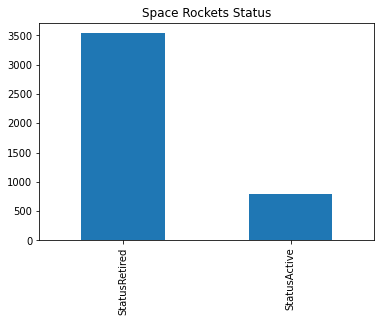

In [18]:
# Overall space rockets statuses in a bar plot
statusRocket_df.plot(kind='bar');
plt.title("Space Rockets Status");

## Asking and Answering Questions

In this section an interesting ideas on how and what information can be obtained from the dataset.

Counting the number of space flights attempted each month, we can see at the end of the year the most flight are ususally attempted.

In [ ]:
flightsEachMonth_df = SF_df['Status Mission'].groupby([SF_df['Datum'].dt.month]).agg('count')
flightsEachMonth_df

Datum
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Status Mission, dtype: int64

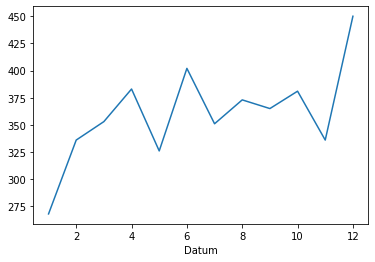

In [ ]:
# Number of flight that happened in each month historically in a plot
flightsEachMonth_df.plot();

Getting the last space flight for each of the company together with all the other information.

In [ ]:
differentCompanies_df = SF_df.sort_values(['Datum']).drop_duplicates(subset='Company Name', keep='last')

In [ ]:
# Check
differentCompanies_df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
4277,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1959-09-18 00:00:00+00:00,Vanguard | Vanguard 3,StatusRetired,NaN,Partial Failure
3800,Arm??e de l'Air,"Brigitte, Hammaguir, Algeria, France",1967-02-15 00:00:00+00:00,Diamant A | Diad?ªme 2,StatusRetired,NaN,Success
3711,AMBA,"LA-5B, RAAF Woomera Range Complex, Australia",1967-11-29 00:00:00+00:00,Redstone Sparta | WRESAT,StatusRetired,NaN,Success
3685,OKB-586,"Site 41/15, Baikonur Cosmodrome, Kazakhstan",1968-03-28 00:00:00+00:00,Cosmos-3 (11K65) | VKZ,StatusRetired,NaN,Success
3489,UT,"Uchinoura Space Center, Japan",1970-02-11 00:00:00+00:00,Lambda-IV S | Osumi,StatusRetired,NaN,Success
3302,RAE,"LA-5B, RAAF Woomera Range Complex, Australia",1971-10-28 00:00:00+00:00,Black Arrow | Prospero,StatusRetired,NaN,Success
3299,CECLES,"ELA-1, Guiana Space Centre, French Guiana, France",1971-11-04 00:00:00+00:00,Europa 2 | Test flight,StatusRetired,NaN,Failure
2887,CNES,"ELD, Guiana Space Centre, French Guiana, France",1975-09-27 00:00:00+00:00,Diamant BP4 | Aura,StatusRetired,NaN,Success
2207,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1984-04-17 00:00:00+00:00,Titan III(24)B | OPS 8424,StatusRetired,NaN,Success
1952,ASI,"SM Launch Tab, San Marco Launch Platform, Kenya",1988-03-25 00:00:00+00:00,Scout G1 | San Marco 5,StatusRetired,NaN,Success


Checking how many places were Space Flights starting from and how many mision each one of them have had.

In [ ]:
startingSites_df = SF_df['Location'].value_counts()
print(startingSites_df.to_string())

Site 31/6, Baikonur Cosmodrome, Kazakhstan                                                 235
Site 132/1, Plesetsk Cosmodrome, Russia                                                    216
Site 43/4, Plesetsk Cosmodrome, Russia                                                     202
Site 41/1, Plesetsk Cosmodrome, Russia                                                     198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                                                  193
Site 132/2, Plesetsk Cosmodrome, Russia                                                    174
Site 133/3, Plesetsk Cosmodrome, Russia                                                    158
Site 43/3, Plesetsk Cosmodrome, Russia                                                     138
LC-39A, Kennedy Space Center, Florida, USA                                                 120
ELA-2, Guiana Space Centre, French Guiana, France                                          118
SLC-40, Cape Canaveral AFS, Florida, USA          

Making a dataframe that will show how many missions were send by companies.

In [ ]:
companies_df = SF_df[['Company Name', 'Status Mission']].groupby(['Company Name']).count()
companies_df

,Status Mission
Company Name,
AEB,3
AMBA,8
ASI,9
Arianespace,279
Arm??e de l'Air,4
Blue Origin,12
Boeing,136
CASC,251
CASIC,5


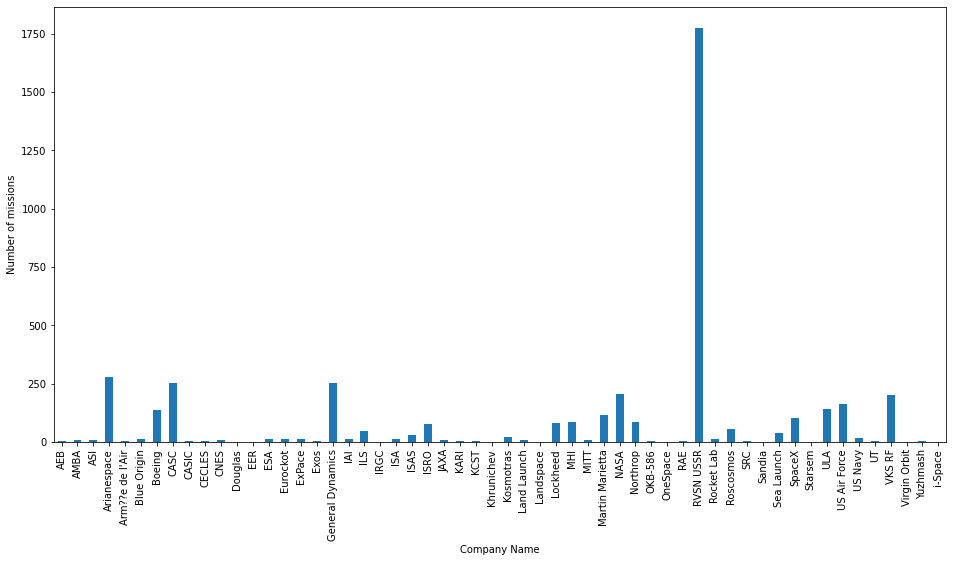

In [ ]:
# Dataframe with number of mission send by a given company shown as a bar plot for better comparison
companies_df.plot(kind='bar', figsize=(16, 8), ylabel='Number of missions', legend=False);

Counting the number of space flights attempted for each year.

In [ ]:
flightsEachYear_df = SF_df['Status Mission'].groupby([SF_df['Datum'].dt.year]).agg('count')
# Check
print(flightsEachYear_df.to_string())

Datum
1957      3
1958     28
1959     20
1960     39
1961     52
1962     82
1963     41
1964     60
1965     87
1966    101
1967    106
1968    103
1969    103
1970    107
1971    119
1972     99
1973    103
1974     98
1975    113
1976    113
1977    114
1978     97
1979     49
1980     55
1981     71
1982     67
1983     66
1984     69
1985     74
1986     62
1987     56
1988     59
1989     52
1990     80
1991     59
1992     62
1993     61
1994     64
1995     61
1996     60
1997     70
1998     68
1999     57
2000     57
2001     43
2002     49
2003     52
2004     40
2005     37
2006     49
2007     50
2008     48
2009     50
2010     37
2011     42
2012     38
2013     46
2014     53
2015     52
2016     90
2017     92
2018    117
2019    109
2020     63


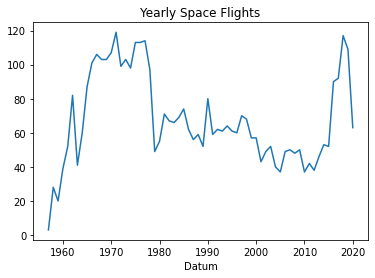

In [ ]:
# Check
flightsEachYear_df.plot();
plt.title("Yearly Space Flights");

## Inferences and Conclusion

Interesting data that can be seen from th work done on the original dataset.

We can see that currently humanity is conducting a second wave of space flight missions, because our technology
    became much better we are probably going to achieve much greater succeses than in 70s

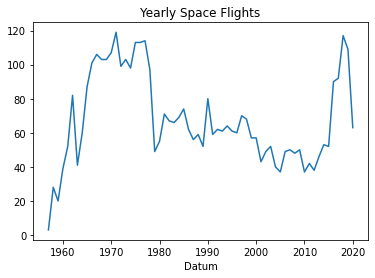

In [ ]:
flightsEachYear_df.plot();
plt.title("Yearly Space Flights");

We can also see that Russian company completely dominates all other space flights companies when it comes to sending
    rockets to the space. It means that other there was a monopoly for a long time in this sector. Another interesting
    thing we can see on this graph is that even though SpaceX is probably the best space flight company in the world
    right now, it still has to work for a long time to achieve a substantial number of rockets sent.

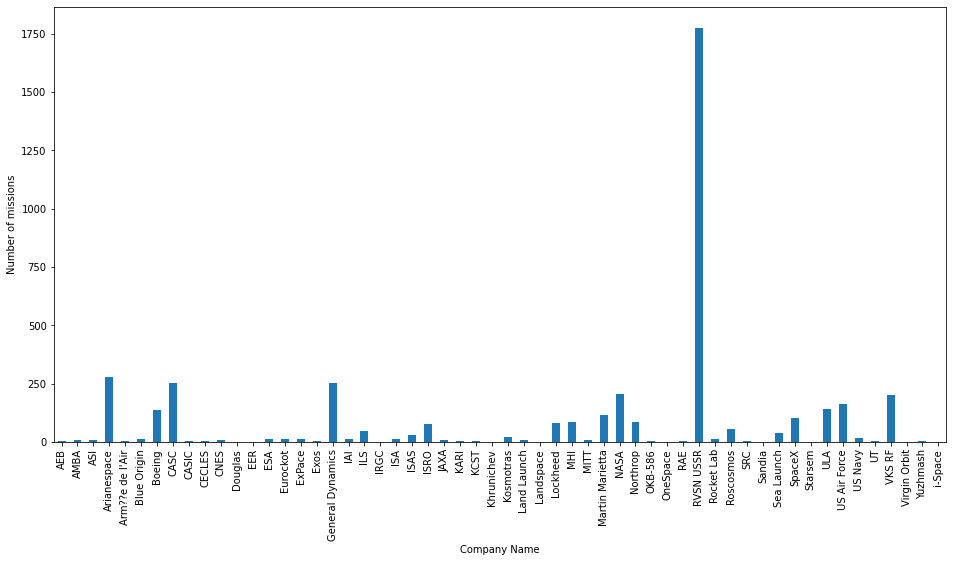

In [ ]:
companies_df.plot(kind='bar', figsize=(16, 8), ylabel='Number of missions', legend=False);

Last but not least information is an interesting fact that when looking at the rocket flights, most of the rockets
    are sent during December and least in January. It could be correlated with the tax period or maybe December is the best
    month for rocket launches from the available launching sites

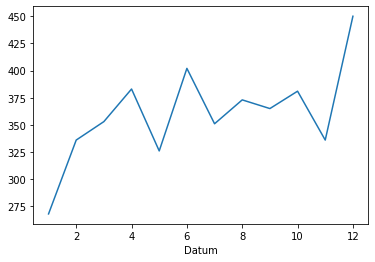

In [ ]:
flightsEachMonth_df.plot();

Things to do in the future:
1. An average number of space flights each year 
2. A list of still active rockets and how many flights these rockets succesed, failed etc.
3. A new column with each flight cost could be added to original df, adn then count how much money each company spend on 
 the space flights missions

## References and Future Work

Website with the original dataset https://www.kaggle.com/agirlcoding/all-space-missions-from-1957